<a href="https://colab.research.google.com/github/Elmir22/Data-science-ML-models-/blob/main/house_rent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice

## Questions

In [145]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

#questions-1

In [146]:
house = pd.read_csv('/content/house_rent.csv')
house.head(3)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Order
0,2022-05-18,2,10000,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner,1
1,2022-05-13,2,20000,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner,2
2,2022-05-16,2,17000,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner,3


#questions-2

In [147]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4746 non-null   int64  
 3   Size               4724 non-null   float64
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4705 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4720 non-null   float64
 11  Point of Contact   4746 non-null   object 
 12  Order              4746 non-null   int64  
dtypes: float64(2), int64(3), object(8)
memory usage: 482.1+ KB


#questions-3

In [148]:
na_per = round((house.isna().sum()/house.shape[0])*100,2)
na_per

Posted On            0.00
BHK                  0.00
Rent                 0.00
Size                 0.46
Floor                0.00
Area Type            0.00
Area Locality        0.00
City                 0.00
Furnishing Status    0.86
Tenant Preferred     0.00
Bathroom             0.55
Point of Contact     0.00
Order                0.00
dtype: float64

#questions-4

In [149]:
house.drop(['Order'], axis=1 , inplace=True)


#questions-5

In [150]:
house.columns = house.columns.str.lower()

In [151]:
house.columns = house.columns.str.replace(' ', '_')

In [152]:
house.head()

,posted_on,bhk,rent,size,floor,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact
0,2022-05-18,2,10000,1100.0,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner
1,2022-05-13,2,20000,800.0,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
2,2022-05-16,2,17000,1000.0,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner
3,2022-07-04,2,10000,800.0,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner
4,2022-05-09,2,7500,850.0,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner


#questions-6

In [156]:
#a
house['size'] = house['size'] * 0.092903

In [157]:
#b
house['posted_on'] = pd.to_datetime(house['posted_on'])
house['Day'] = house['posted_on'].dt.day_name()

In [158]:
#c an d
list1 = []
list2 = []
for i in house.floor:
    list1.append(i.split(' out of ')[0])
    try:
        list2.append(i.split(' out of ')[1])
    except:
        list2.append(i.split(' out of ')[0])

In [159]:
house['floor_number'] = list1
house['total_floors'] = list2

In [160]:
#e
house['Rent_per_m2'] = house['rent'] / house['size']

#questions-7

In [161]:
house.furnishing_status.nunique()

3

#questions-8

In [162]:
bachelors = house.tenant_preferred.str.contains('Bachelors')
bachelors.sum()

4274

#questions-10

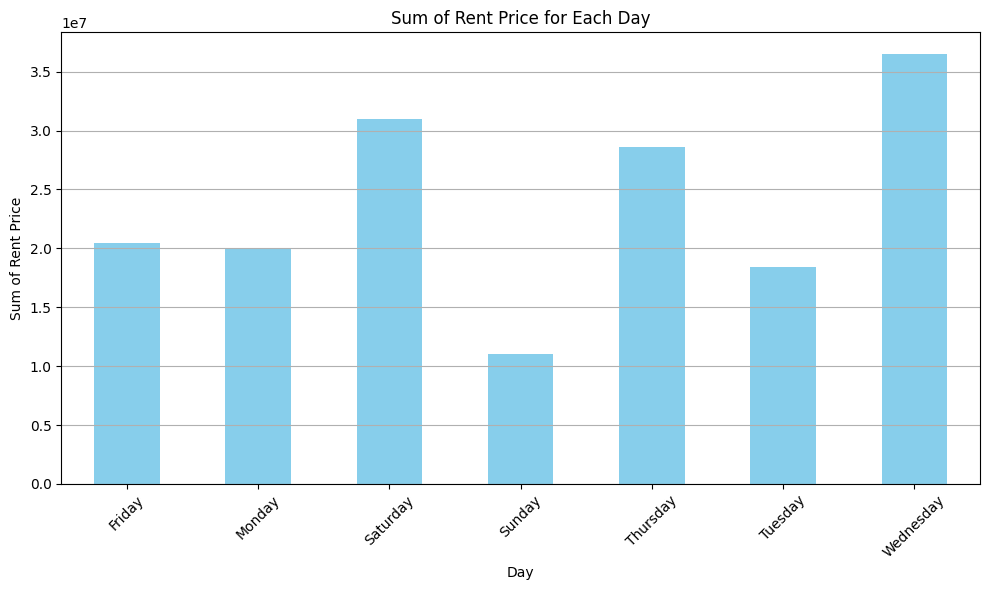

In [163]:
plt.figure(figsize=(10, 6))
house.groupby('Day')['rent'].sum().plot(kind='bar', color='skyblue')
plt.title('Sum of Rent Price for Each Day')
plt.xlabel('Day')
plt.ylabel('Sum of Rent Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#questions-11

In [164]:
four_bathroom_apartments = house[house['bathroom'] == 4.0]
four_bathroom_apartments

,posted_on,bhk,rent,size,floor,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact,Day,floor_number,total_floors,Rent_per_m2
533,2022-07-07,4,130000,14.241096,13 out of 18,Carpet Area,"Ajmera Bhakti Park, Bhakti Park",Mumbai,Semi-Furnished,Bachelors/Family,4.0,Contact Agent,Thursday,13,18,9128.510751
542,2022-06-21,3,270000,15.535741,3 out of 7,Carpet Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,4.0,Contact Agent,Tuesday,3,7,17379.280084
579,2022-06-25,4,300000,13.809548,53 out of 78,Carpet Area,"Trump Tower, Worli",Mumbai,Semi-Furnished,Bachelors/Family,4.0,Contact Agent,Saturday,53,78,21724.100105
600,2022-07-09,4,120000,13.809548,9 out of 29,Carpet Area,"Anant Bhoomi, Mahavir Nagar",Mumbai,Unfurnished,Family,4.0,Contact Agent,Saturday,9,29,8689.640042
603,2022-06-03,3,150000,12.946451,7 out of 10,Carpet Area,"Almeida Park, Turner Road",Mumbai,Semi-Furnished,Bachelors/Family,4.0,Contact Agent,Friday,7,10,11586.186723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4477,2022-05-12,3,24000,14.672645,1 out of 5,Super Area,"Manikonda, Outer Ring Road",Hyderabad,Semi-Furnished,Bachelors/Family,4.0,Contact Owner,Thursday,1,5,1635.696949
4479,2022-07-07,6,20000,20.714322,Ground out of 1,Super Area,"Mallikarjuna Nagar, Secunderabad",Hyderabad,Unfurnished,Family,4.0,Contact Owner,Thursday,Ground,1,965.515560
4553,2022-07-02,4,17000,13.809548,2 out of 5,Super Area,Mehdipatnam,Hyderabad,Unfurnished,Bachelors/Family,4.0,Contact Owner,Saturday,2,5,1231.032339
4625,2022-07-05,3,20000,15.535741,2 out of 2,Carpet Area,Manigunda,Hyderabad,Semi-Furnished,Bachelors/Family,4.0,Contact Owner,Tuesday,2,2,1287.354080


In [165]:
average_price = four_bathroom_apartments['rent'].mean()
average_size = four_bathroom_apartments['size'].mean()
print("Average price of 4-bathroom apartments:", average_price)
print("Average size of 4-bathroom apartments:", average_size)

Average price of 4-bathroom apartments: 168735.48387096773
Average size of 4-bathroom apartments: 19.392335992844714


#questions-12

In [166]:
size_50 = house[house["size"]> 50]
size_50

,posted_on,bhk,rent,size,floor,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact,Day,floor_number,total_floors,Rent_per_m2
3622,2022-05-24,5,100000,51.785804,9 out of 12,Super Area,Navalur,Chennai,Semi-Furnished,Bachelors/Family,4.0,Contact Agent,Tuesday,9,12,1931.031120
4185,2022-06-06,1,200000,69.047739,Ground out of 4,Super Area,"Beeramguda, Ramachandra Puram, NH 9",Hyderabad,Unfurnished,Bachelors/Family,10.0,Contact Owner,Monday,Ground,4,2896.546681
4457,2022-07-06,4,400000,60.416772,Lower Basement out of 2,Carpet Area,Jubilee Hills,Hyderabad,Semi-Furnished,Bachelors/Family,6.0,Contact Agent,Wednesday,Lower Basement,2,6620.678127


In [167]:
average_price = size_50['rent'].mean()
print("Average price of apartments with size greater than 50:  ", average_price)

Average price of apartments with size greater than 50:   233333.33333333334


#questions-13

In [168]:
correlation_matrix = house[['rent', 'size', 'bathroom']].corr()
correlation_matrix

,rent,size,bathroom
rent,1.000000,0.414104,0.442051
size,0.414104,1.000000,0.741960
bathroom,0.442051,0.741960,1.000000


#questions-14

In [169]:
skewness = house['size'].skew()

print("Skewness score of 'Size' column:", skewness)

Skewness score of 'Size' column: 2.302608131868972


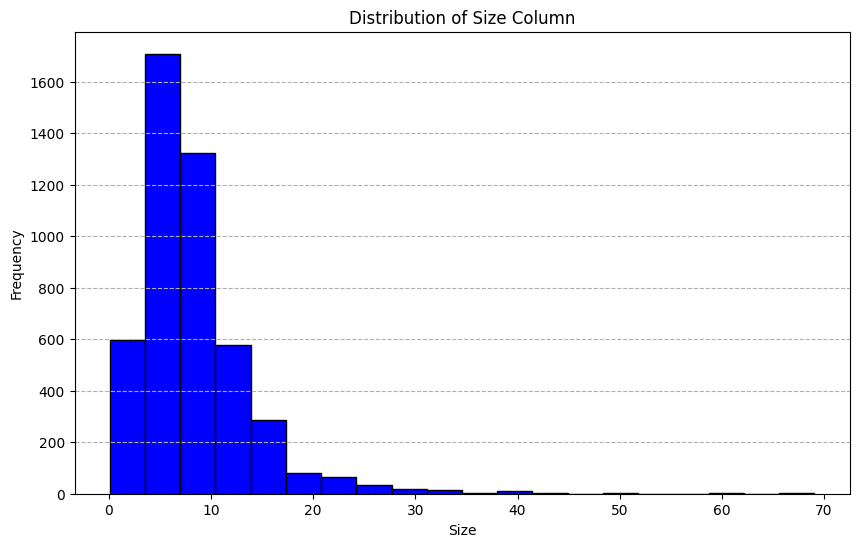

In [170]:
plt.figure(figsize=(10,6))
plt.hist(house['size'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Size Column')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()

#questions-14.2

In [171]:
house['rent_standardized'] = (house['rent'] - house['rent'].mean()) / house['rent'].std()
house.rent_standardized

0      -0.319992
1      -0.191962
2      -0.230371
3      -0.319992
4      -0.352000
          ...   
4741   -0.255977
4742   -0.076734
4743    0.000084
4744    0.128114
4745   -0.255977
Name: rent_standardized, Length: 4746, dtype: float64

In [172]:
house

,posted_on,bhk,rent,size,floor,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact,Day,floor_number,total_floors,Rent_per_m2,rent_standardized
0,2022-05-18,2,10000,9.494064,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2.0,Contact Owner,Wednesday,Ground,2,1053.289702,-0.319992
1,2022-05-13,2,20000,6.904774,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner,Friday,1,3,2896.546681,-0.191962
2,2022-05-16,2,17000,8.630967,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1.0,Contact Owner,Monday,1,3,1969.651743,-0.230371
3,2022-07-04,2,10000,6.904774,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1.0,Contact Owner,Monday,1,2,1448.273340,-0.319992
4,2022-05-09,2,7500,7.336322,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1.0,Contact Owner,Monday,1,2,1022.310593,-0.352000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,8.630967,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,NaN,Bachelors/Family,NaN,Contact Owner,Wednesday,3,5,1737.928008,-0.255977
4742,2022-05-15,3,29000,17.261935,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,NaN,Bachelors/Family,NaN,Contact Owner,Sunday,1,4,1679.997075,-0.076734
4743,2022-07-10,3,35000,15.104193,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,NaN,Bachelors/Family,NaN,Contact Agent,Sunday,3,5,2317.237345,0.000084
4744,2022-07-06,3,45000,12.946451,23 out of 34,Carpet Area,Gachibowli,Hyderabad,NaN,Family,NaN,Contact Agent,Wednesday,23,34,3475.856017,0.128114
